In [1]:
import pandas as pd
data = pd.read_csv("final_df.csv")

In [2]:
# 1
print("N of rows:", len(data))
print("N of cols:", len(data.columns))
data.head()

N of rows: 960
N of cols: 11


,links,reviews,name,author,price,rating,rating_cnt,review_cnt,year,age,page
0,https://www.litres.ru/book/vlad-hononov/izucha...,"['Эта книга из той лиги, в которой я пока не с...",Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,549.0,0.00,0,1,2022.0,0,319
1,https://www.litres.ru/book/toni-geddis-3249116...,['Шикарная книга! Начал изучать Python самосто...,Начинаем программировать на Python,Тони Гэддис,599.0,4.94,16,6,2021.0,12,875
2,https://www.litres.ru/book/martin-kleppman-173...,"['Не могу что-либо про перевод сказать, читал ...",Высоконагруженные приложения. Программирование...,Мартин Клеппман,799.0,3.98,51,11,2017.0,16,640
3,https://www.litres.ru/book/aleks-suy/system-de...,['Добротная книга по разработке архитектуры пр...,System Design. Подготовка к сложному интервью,Алекс Сюй,699.0,3.59,17,9,2020.0,16,304
4,https://www.litres.ru/book/dzheyd-karter/neyro...,['Книга отличная. Давно хотела понять как все ...,Нейросети начало,Джейд Картер,690.0,4.87,437,37,2023.0,12,102


In [3]:
# 2 - Да
data.isna().sum()
data = data.dropna()

In [4]:
# 3
data.info()
data['year'] = data['year'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 0 to 959
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   links       895 non-null    object 
 1   reviews     895 non-null    object 
 2   name        895 non-null    object 
 3   author      895 non-null    object 
 4   price       895 non-null    float64
 5   rating      895 non-null    float64
 6   rating_cnt  895 non-null    int64  
 7   review_cnt  895 non-null    int64  
 8   year        895 non-null    float64
 9   age         895 non-null    int64  
 10  page        895 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 83.9+ KB


In [5]:
# 4 
# Median price - 349
# Mode of age restriction - 0+
# Mean review_cnt - 2.3125
# N of books with rating <4.25 - 557
# Most popular year - 2023
from statistics import mode
print("Mode of age restriction:", mode(data['age']))
print("Mode of year written:", mode(data['year']))
print("N of books with rating <4.25:", len(data[data['rating'] < 4.25]))
data.describe()

Mode of age restriction: 0
Mode of year written: 2023.0
N of books with rating <4.25: 550


,price,rating,rating_cnt,review_cnt,age,page
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,360.556514,2.758804,13.280447,2.156425,5.385475,236.881564
std,276.403567,2.140337,41.518420,4.179167,6.812445,238.522816
min,40.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,100.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,250.000000,3.920000,2.000000,1.000000,0.000000,195.000000
75%,549.000000,4.670000,9.000000,3.000000,12.000000,382.000000
max,2200.000000,5.000000,437.000000,41.000000,18.000000,1223.000000


In [6]:
# 5
# Free point - stonks

In [7]:
# 6
data['is_popular'] = data.apply(lambda x: 1 if x['rating'] >= 4.6 and x['review_cnt'] >= 5 else 0, axis = 1)

In [8]:
# 7
# Popular page avg - 353.2
# Unpopular page avg - 238.5
print(data[data["is_popular"] == 1]["page"].mean())
print(data[data["is_popular"] == 0]["page"].mean())

368.1333333333333
232.32947976878611


In [9]:
# 8
data.sort_values("review_cnt", ascending=False).head(10)[['name', 'author', 'review_cnt']]

,name,author,review_cnt
432,Оптимизация в Python,Джейд Картер,41
4,Нейросети начало,Джейд Картер,37
196,Психбольница в руках пациентов. Алан Купер об ...,Алан Купер,30
112,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,28
318,Идеальный программист. Как стать профессионало...,Роберт Мартин,27
459,"Говорят, в IT много платят. Как построить успе...",Елена Правдина,27
137,#Сам себе программист. Как научиться программи...,Кори Альтхофф,25
37,Сделай видеоигру один и не свихнись,Слава Грис,24
54,Как пасти котов. Наставление для программистов...,Дж. Ханк Рейнвотер,23
102,Нейросети. Обработка естественного языка,Джейд Картер,19


In [10]:
# 9
import ast
rev_cnt = 0
rev_size = 0
revs = data['reviews'].tolist()
for bk in revs:
    bk = ast.literal_eval(bk)
    rev_cnt += len(bk)
    for review in bk:
        rev_size += len(review)
print(rev_size/rev_cnt)

374.8305699481865


In [11]:
# 10
# Удивительно, но все фичи положительно коррелируют друг с другом
# Из интересного - книжки с более маленьким возрастным рейтингом стоят явно дешевле
# Довольно часто большая книжка стоит больше
# Популярная книжка - не обязательно дорогая или большая
# Чем дороже книжка - тем больше у нее оценка
# У бОльших книжек больший рейтинг
numeric_cols = data.describe().columns
data[numeric_cols].corr()

,price,rating,rating_cnt,review_cnt,age,page,is_popular
price,1.000000,0.412042,0.214165,0.279130,0.494697,0.626805,0.167868
rating,0.412042,1.000000,0.257363,0.360309,0.413557,0.478921,0.186526
rating_cnt,0.214165,0.257363,1.000000,0.679775,0.223373,0.113477,0.631253
review_cnt,0.279130,0.360309,0.679775,1.000000,0.335764,0.264604,0.407682
age,0.494697,0.413557,0.223373,0.335764,1.000000,0.385599,0.160864
page,0.626805,0.478921,0.113477,0.264604,0.385599,1.000000,0.102535
is_popular,0.167868,0.186526,0.631253,0.407682,0.160864,0.102535,1.000000


[Text(0.5, 1.0, 'Scatterplot of # of pages vs # of reviews')]

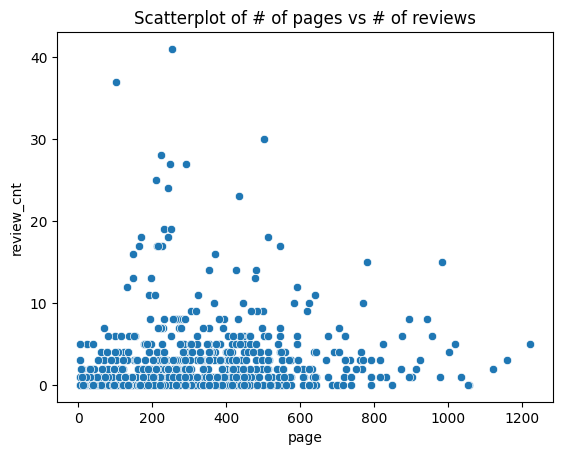

In [12]:
# 11
# По графику видно что особой связи между этими двумя признаками нет
# Маленькие книжки оценивают больше, но нужно учитывать что маленьких книжек явно больше
import seaborn as sns
sns.scatterplot(data=data, x="page", y="review_cnt").set(title="Scatterplot of # of pages vs # of reviews")

[Text(0.5, 1.0, 'Lineplot of # of books and year of creation')]

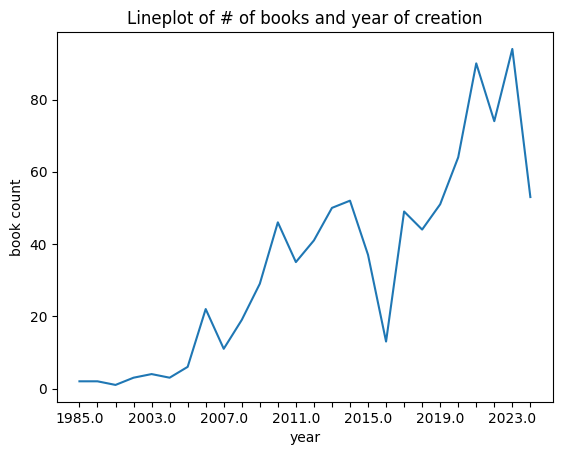

In [13]:
# 12
# По графику видно что количество книг на платформе растет с каждым годом.
# Возможно это связано с желанием платформы оставаться современной/отсутствием более старых книг
# Возможные падения в 2016 году может быть связано с маленьким семплом данных
# Падение в 2024 связано с тем что год еще не закончился. Эстраполируя текущее состояние видно что тренд продолжится.
year_grouped = data.groupby("year", as_index=False).count().dropna()
plt = sns.lineplot(data=year_grouped.rename({"links":"book count"}, axis = 1), x="year", y="book count", n_boot=100)

for ind, label in enumerate(plt.get_xticklabels()):
    if ind % 4 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.set(title="Lineplot of # of books and year of creation")

[Text(0.5, 1.0, 'Distribution of price with respect to popularity')]

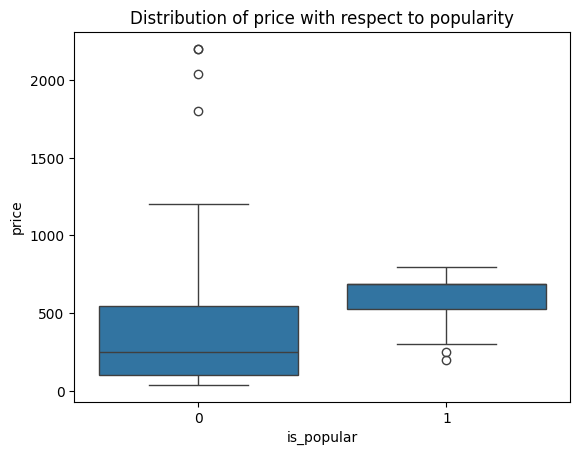

In [30]:
# 13
# Из boxplot'а видно что популярная книга в общем стоют чуть дороже не популярных, но все еще дешево.
sns.boxplot(data=data, x="is_popular", y="price").set(title="Distribution of price with respect to popularity")

[Text(0.5, 1.0, 'Distribution of price with respect to popularity')]

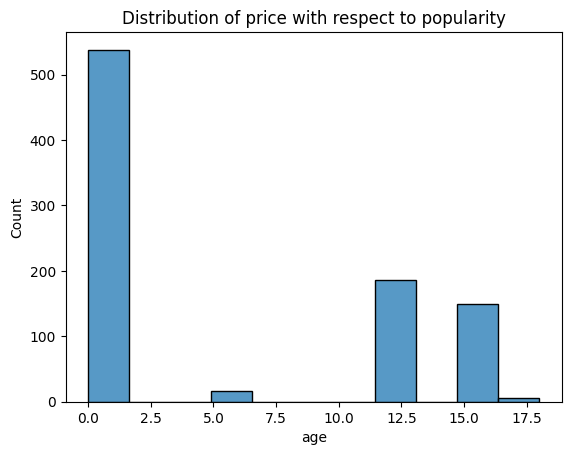

In [32]:
# Из этой гистограммы видно что многие книжки по программированию доступны с 0 лет (айтишник с 0 лет)
sns.histplot(data=data, x="age").set(title="Distribution of price with respect to popularity")

In [23]:
# 14
data.groupby("author", as_index=False).agg({"name": "count", "rating": "mean", "review_cnt": "mean"})

,author,name,rating,review_cnt
0,Arsen Gonian,1,5.00,1.0
1,C. И. Никишов,1,4.67,3.0
2,ChatGPT-4,1,3.83,12.0
3,Eugeny Shtoltc,2,2.50,0.0
4,Jade Carter,1,0.00,0.0
...,...,...,...,...
642,Я. А. Хетагуров,1,4.83,0.0
643,Я. М. Иваньо,1,0.00,0.0
644,Я. Н. Зайдельман,1,0.00,2.0
645,Ян Пойнтер,1,3.60,2.0


In [37]:
# 15
# Зависит ли оценка от длины комментариев людей?
import numpy as np
data['review_lengths'] = data['reviews'].apply(lambda x: np.mean([len(rev) for rev in ast.literal_eval(x)]))
review_data = data.dropna()

c:\Users\Sava\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Sava\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [44]:
review_data[['review_lengths', "rating"]].corr()

,review_lengths,rating
review_lengths,1.00000,-0.04782
rating,-0.04782,1.00000


[Text(0.5, 1.0, 'Scatterplot of # of pages vs # of reviews')]

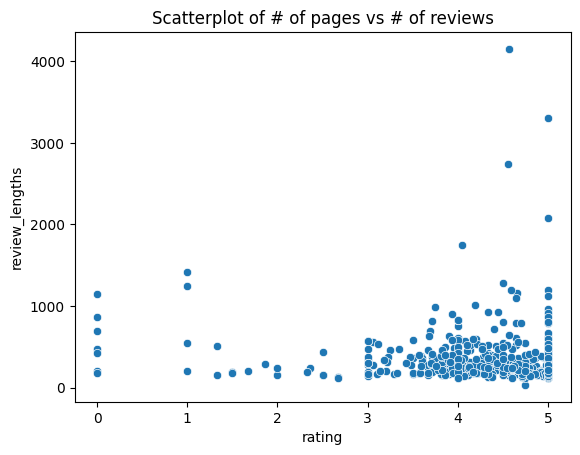

In [42]:
sns.scatterplot(data=review_data, x="rating", y="review_lengths").set(title="Scatterplot of # of pages vs # of reviews")
# Оказывается что нет! Люди пишут большие отзывы как для книг которые им понравилось, так и для книг которые не понравились, что указывает на здоровую критику и восхваление